<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/sports-analytics/blob/master/Xt_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xt model for passes during football matches. 

Train a model with spatial features of passes (i.e. origin, destination) to estimate the duration of individual passes. This allows you to identify which players typically circulate the ball faster than others, This idea was orginally was devinpleuler. 

Here we take passes data from a single match between sweden and england and try to use machine learning models to predict expected passing time and compare with actual time taken for pass.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
match_id=69301
file_name=str(match_id)+".json"
import json
with open("/content/drive/My Drive/Statsbomb/events/"+file_name) as data_file:
  data=json.load(data_file)

In [ ]:
from pandas import json_normalize
df=json_normalize(data,sep="_").assign(match_id=file_name[:-5])

In [ ]:
df.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [ ]:
df=df.loc[df["type_name"]=='Pass']
y=df[["duration"]]

In [ ]:
x=df[["location","pass_length","pass_angle","pass_height_name","pass_end_location",]]

In [ ]:
x

,location,pass_length,pass_angle,pass_height_name,pass_end_location
4,"[60.0, 40.0]",2.102380,0.442374,Ground Pass,"[61.9, 40.9]"
8,"[82.6, 37.6]",21.317833,1.769112,Ground Pass,"[78.4, 58.5]"
11,"[84.7, 65.3]",18.984203,0.725767,Ground Pass,"[98.9, 77.9]"
14,"[94.7, 75.5]",11.287161,-1.695151,Ground Pass,"[93.3, 64.3]"
18,"[94.2, 64.6]",25.223997,-0.403330,Ground Pass,"[117.4, 54.7]"
...,...,...,...,...,...
3271,"[77.0, 20.1]",14.024621,0.274382,Ground Pass,"[90.5, 23.9]"
3274,"[91.8, 19.4]",17.380737,-0.936501,Ground Pass,"[102.1, 5.4]"
3277,"[102.9, 8.6]",17.293930,-3.037321,Ground Pass,"[85.7, 6.8]"
3280,"[86.8, 8.5]",42.174046,1.041356,High Pass,"[108.1, 44.9]"


In [ ]:
x.dropna()

,location,pass_length,pass_angle,pass_height_name,pass_end_location
4,"[60.0, 40.0]",2.102380,0.442374,Ground Pass,"[61.9, 40.9]"
8,"[82.6, 37.6]",21.317833,1.769112,Ground Pass,"[78.4, 58.5]"
11,"[84.7, 65.3]",18.984203,0.725767,Ground Pass,"[98.9, 77.9]"
14,"[94.7, 75.5]",11.287161,-1.695151,Ground Pass,"[93.3, 64.3]"
18,"[94.2, 64.6]",25.223997,-0.403330,Ground Pass,"[117.4, 54.7]"
...,...,...,...,...,...
3271,"[77.0, 20.1]",14.024621,0.274382,Ground Pass,"[90.5, 23.9]"
3274,"[91.8, 19.4]",17.380737,-0.936501,Ground Pass,"[102.1, 5.4]"
3277,"[102.9, 8.6]",17.293930,-3.037321,Ground Pass,"[85.7, 6.8]"
3280,"[86.8, 8.5]",42.174046,1.041356,High Pass,"[108.1, 44.9]"


In [ ]:
for i in list(y["duration"]):
  if i<=0:
    print(i)

In [ ]:
X=[]
j=0
for p,i in x.iterrows():
  x_=[0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  i=list(i)
  x_[0]=i[0][0]
  x_[1]=i[0][1]
  x_[2]=i[4][0]
  x_[3]=i[4][1]
  x_[4]=i[1]
  x_[5]=i[2]
  if i[3]=="Ground Pass":
    x_[6]=0
  elif i[3]=="Low Pass":
    x_[6]=1
  else :
    x_[6]=2
  j=j+1
  X.append(x_)

In [ ]:
y

,duration
4,0.168730
8,1.173625
11,1.019100
14,0.700000
18,4.150000
...,...
3271,0.988864
3274,1.533881
3277,1.148229
3280,1.659600


In [ ]:
Y=list(y["duration"])

In [ ]:
import sklearn as sk
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(690, 690, 231, 231)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.42308392693396685

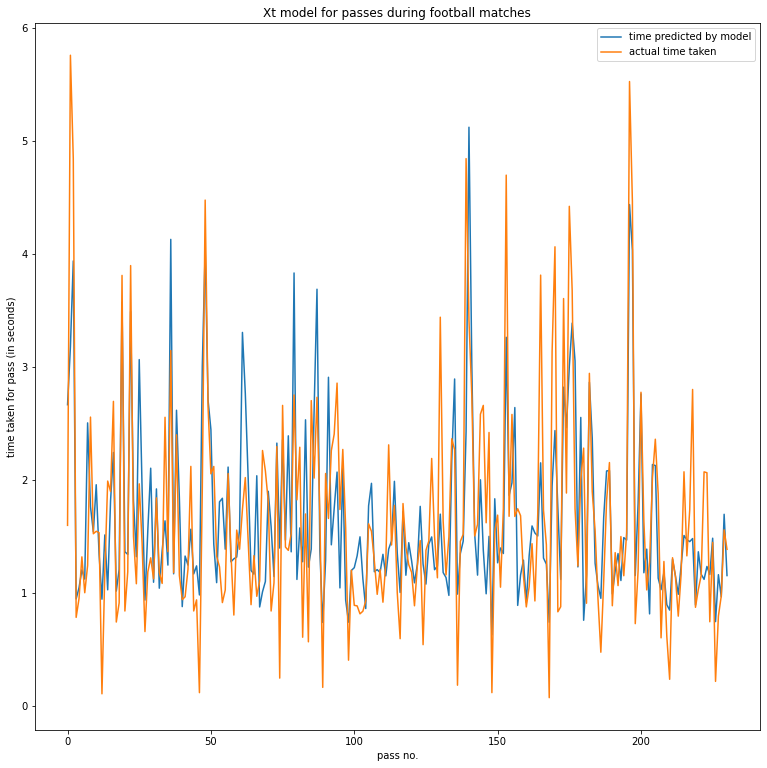

In [ ]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("time taken for pass (in seconds)")
plt.plot(linear_reg.predict(x_test),label="time predicted by model")
plt.plot(y_test,label="actual time taken")
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

In [ ]:
linear_reg.coef_

array([ 0.00108735, -0.00277278, -0.00076228,  0.00314499,  0.04706637,
       -0.0223671 ,  0.14866696])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1= StandardScaler()
scaler1.fit(X)
x_ss=scaler1.transform(X)

In [ ]:
Y_np=np.array(Y)
scaler2= StandardScaler()
scaler2.fit(Y_np.reshape(-1,1))
y_ss=scaler2.transform(Y_np.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_ss,y_ss)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.5478651667555511

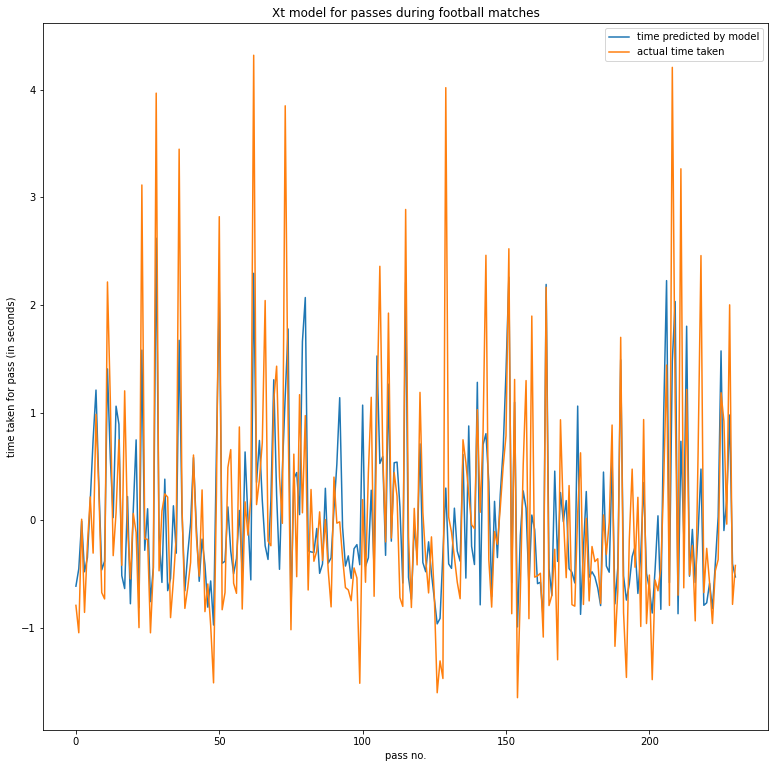

In [ ]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("time taken for pass (in seconds)")
plt.plot(linear_reg.predict(x_test),label="time predicted by model")
plt.plot(y_test,label="actual time taken")
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

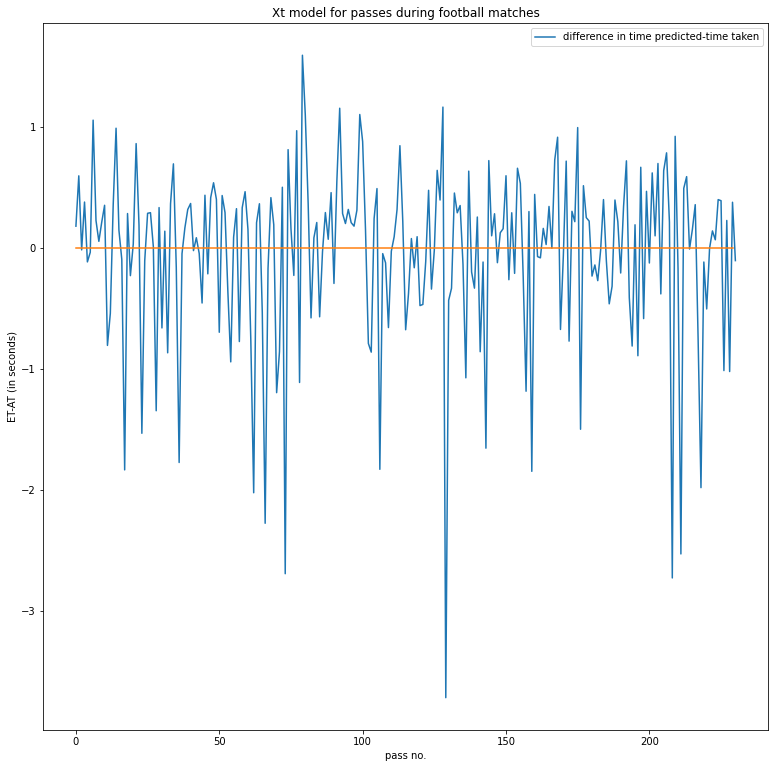

In [ ]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("ET-AT (in seconds)")
plt.plot(linear_reg.predict(x_test)-y_test,label="difference in time predicted-time taken")
plt.plot(np.zeros(230))
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

In [ ]:
yz=y_train.reshape(690)

In [ ]:
import tensorflow as tf

In [ ]:
def model():
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(128,activation=tf.nn.relu),
      tf.keras.layers.Dense(1,kernel_initializer='normal')
      ])
    model.compile(loss='mean_squared_error',optimizer='adam')
    return(model)

In [ ]:
m1=model()

In [ ]:
history = m1.fit(x_train,y_train,validation_split=0.2,verbose=0, epochs=100)

In [ ]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.00])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

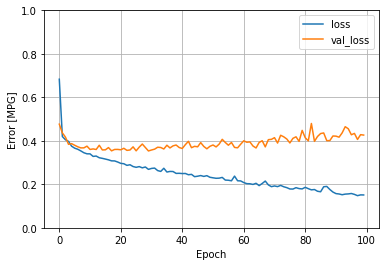

In [ ]:
plot_loss(history)

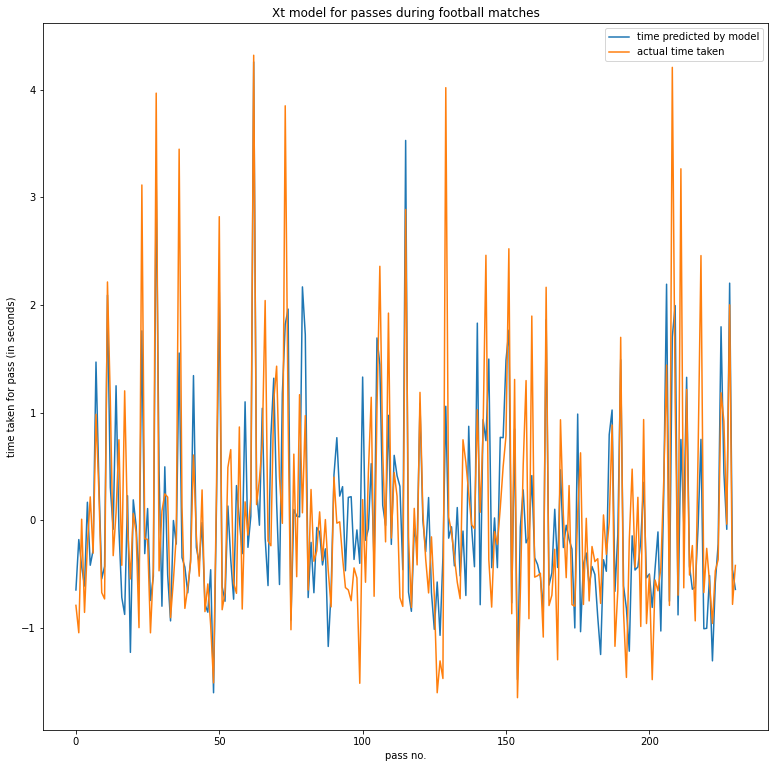

In [ ]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("time taken for pass (in seconds)")
plt.plot(m1.predict(x_test),label="time predicted by model")
plt.plot(y_test,label="actual time taken")
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

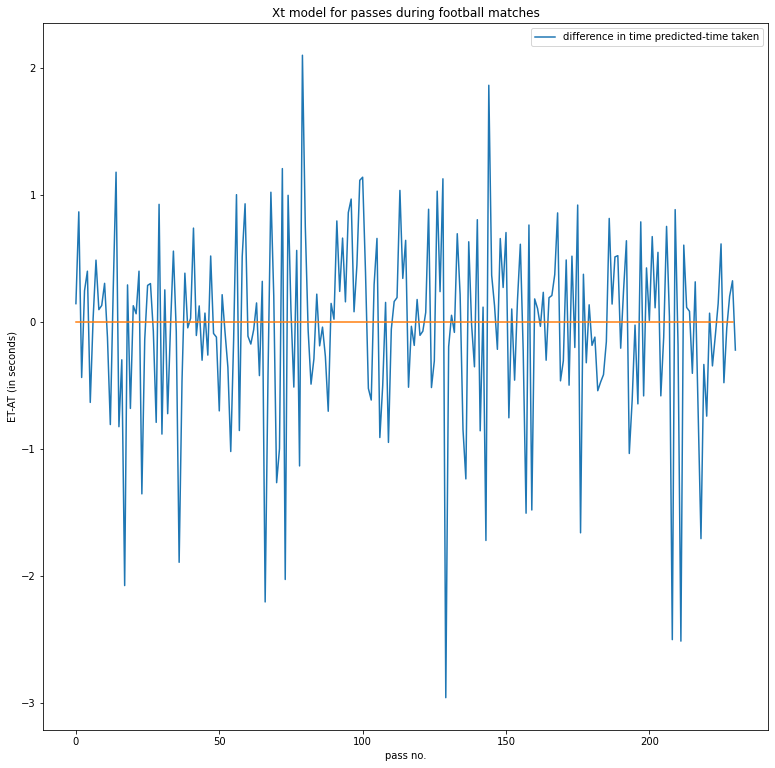

In [ ]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("ET-AT (in seconds)")
plt.plot(m1.predict(x_test)-y_test,label="difference in time predicted-time taken")
plt.plot(np.zeros(230))
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

In [ ]:
np.mean((m1.predict(x_test)-y_test)**2)

0.5293281891622392